In [66]:
import pandas as pd
train_data = pd.read_csv('train.csv',index_col = 'PassengerId')
# train_data.describe()
test_data = pd.read_csv('test.csv',index_col = 'PassengerId')
test_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [67]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

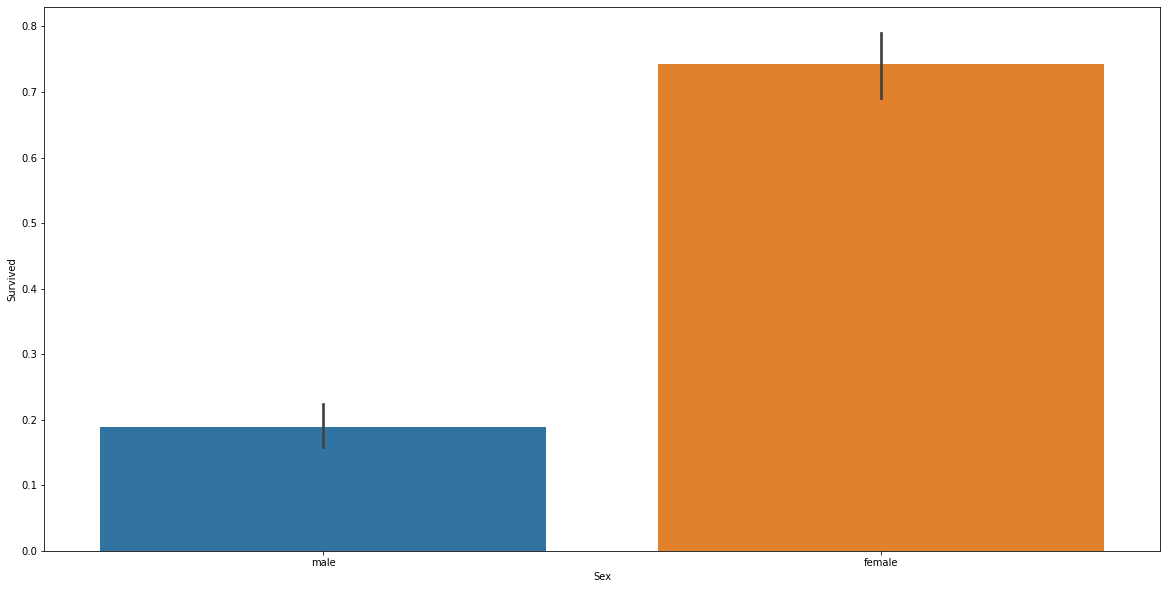

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.barplot(x = train_data['Sex'], y =train_data['Survived'] )

<AxesSubplot:xlabel='Age', ylabel='Survived'>

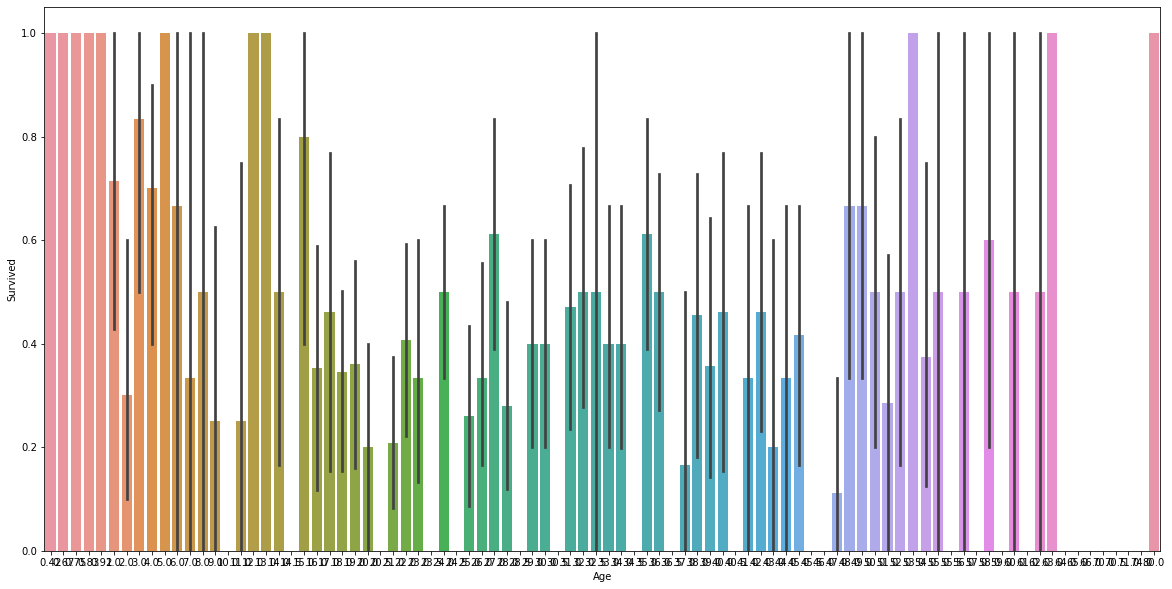

In [69]:
plt.figure(figsize=(20,10))
sns.barplot(x = train_data['Age'], y =train_data['Survived'] )

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

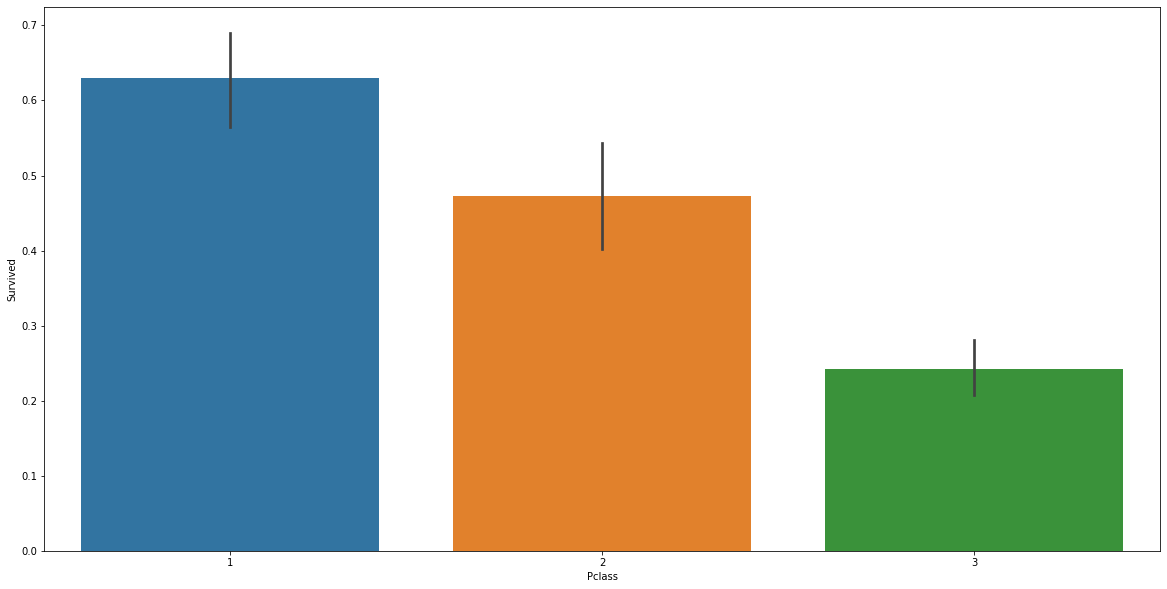

In [70]:
plt.figure(figsize=(20,10))
sns.barplot(x = train_data['Pclass'], y =train_data['Survived'] )

In [71]:

y = train_data.Survived
features = ['Age','Pclass','Sex']
X = train_data[features]
sex = {'male': 1,'female': 2}
X.Sex = [sex[item] for item in X.Sex]
na_value = X['Age'].median()
X['Age'] = X['Age'].fillna(na_value)

D:\Python\IDE\Anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-71-1d29105e7291>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = X['Age'].fillna(na_value)


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [73]:
train_X,val_X,train_y,val_y = train_test_split(X,y,random_state = 1)
model = RandomForestRegressor(random_state = 1)
model.fit(train_X,train_y)
val_preds = model.predict(val_X)
print(mean_absolute_error(val_y,val_preds))

0.2709554951151811


In [74]:
train_X,val_X,train_y,val_y = train_test_split(X,y,random_state = 1)
model = DecisionTreeRegressor(random_state = 1)
model.fit(train_X,train_y)
val_preds = model.predict(val_X)
print(mean_absolute_error(val_y,val_preds))

0.262365870172101


In [78]:
full_model = RandomForestRegressor(random_state = 1)
full_model.fit(train_X,train_y)
test_X = test_data[features]
sex = {'male': 1,'female': 2}
test_X.Sex = [sex[item] for item in test_X.Sex]
na_value = test_X['Age'].median()
test_X['Age'] = test_X['Age'].fillna(na_value)
test_X.describe()

D:\Python\IDE\Anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-78-9f6af9e1235a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['Age'] = test_X['Age'].fillna(na_value)


,Age,Pclass,Sex
count,418.000000,418.000000,418.000000
mean,29.599282,2.265550,1.363636
std,12.703770,0.841838,0.481622
min,0.170000,1.000000,1.000000
25%,23.000000,1.000000,1.000000
50%,27.000000,3.000000,1.000000
75%,35.750000,3.000000,2.000000
max,76.000000,3.000000,2.000000


In [84]:
test_X

,Age,Pclass,Sex
PassengerId,,,
892,34.5,3,1
893,47.0,3,2
894,62.0,2,1
895,27.0,3,1
896,22.0,3,2
...,...,...,...
1305,27.0,3,1
1306,39.0,1,2
1307,38.5,3,1


In [87]:
test_preds = full_model.predict(test_X)
test_preds = [int(i + (0.5 if i > 0 else -0.5)) for i in test_preds]
print(test_preds)

[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [1]:
output = pd.DataFrame({'PassengerId': test_data.index,
                      'Survived': test_preds})
output.to_csv('submission.csv', index=False)

NameError: name 'pd' is not defined